# Introduction

Notebook was prepared for labolatory report, which may present a result of exercise **"Physical fitness assessment"**

## Imports

Below we have necessary imports of modules, which we used in notebook:

- **numpy** - library for ranges in arguments and values, also in function, where we found common point in two arrays of values.
- **matplotlib.pyplot** - most important module, every picture is build by this module, core of the pictures - subplots() function
- **matplotlib.ticker** - usefull settings to create additional axes in picture for minor and major axes value

In [419]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

## Prepearing the data from laboratory

All array is result of measuring and estimation for exercise. **hr** varabile is prepared for const value in plots.

In [432]:
n1 = [100, 102, 120, 72, 90, 110]        # Arguments for first point - P1
n2 = [150, 168, 192, 120, 130, 180]      # Arguments for second point - P2
hr1 = [109, 98, 110, 119, 128, 131]      # Values for first point - P1
hr2 = [136, 143, 142, 152, 161, 149]     # Values for second point - P2
hr = 170                                 # Const value for simply line

## Set the points coordinates from data (from arguments and values)

We used a **zip()** function to create pair of coordinates of points, which will be used to draw a line in next steps.

In [436]:
p1 = zip(n1, hr1)                        # Arrays of first points - P1
p2 = zip(n2, hr2)                        # Arrays of second points - P2

## Main loop to display graphs with all annotatations, lines and points

Below we have a few important sections, where we have useful features for us. I will try to explain you each of them in comments.

Core of the loop is another **zip()** function where we can enumarate loop for each pair of points (P1, P2). Besides the **zip()** function for points, a **subplots()** function from **matplotlib.pyplot** module is also very crucial things. Every next modification on picture/ficutre will be executed on objects that function returned.

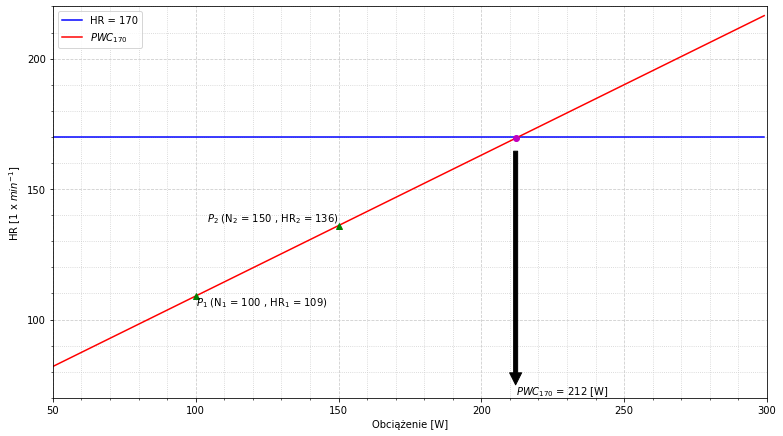

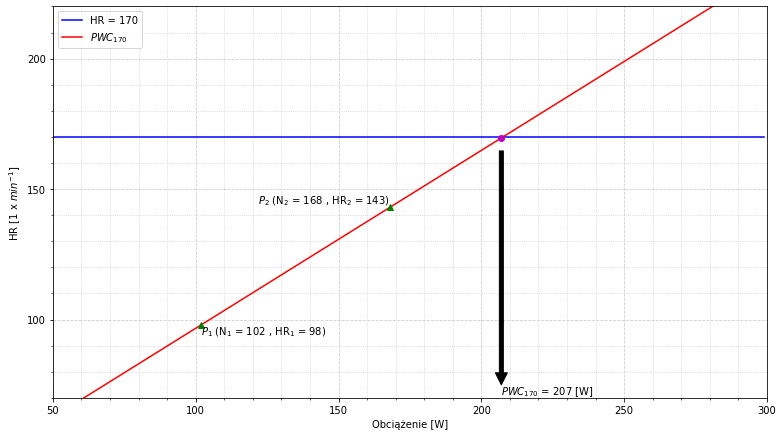

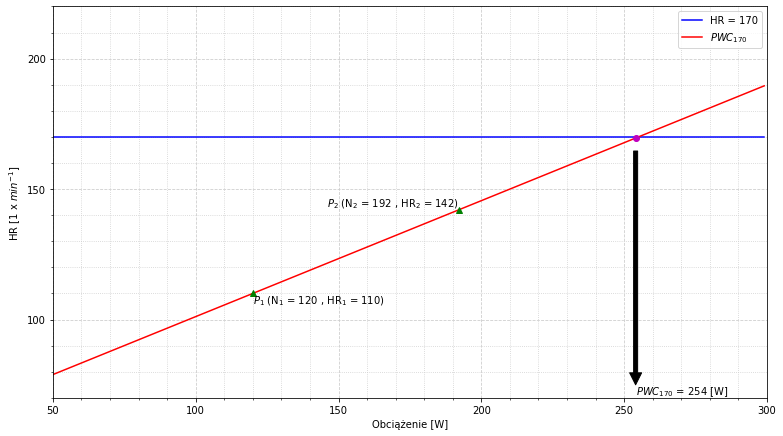

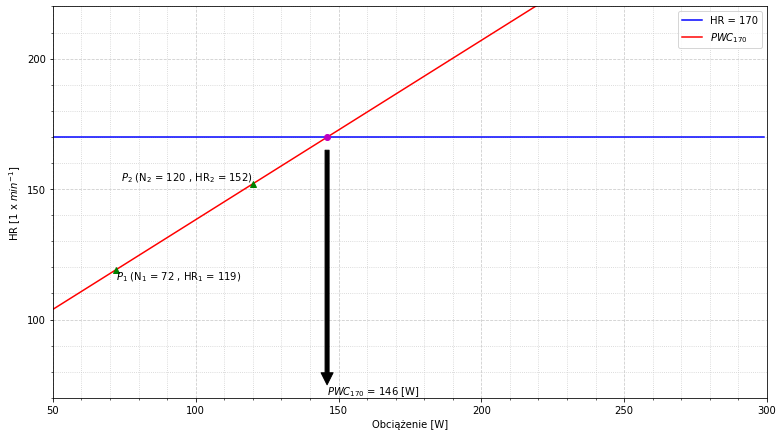

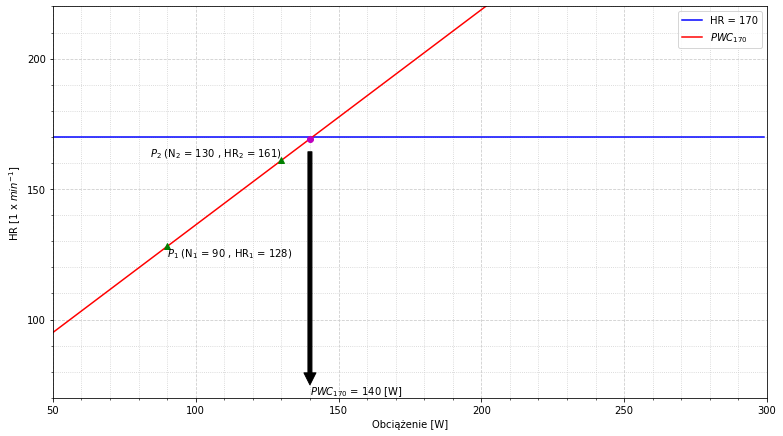

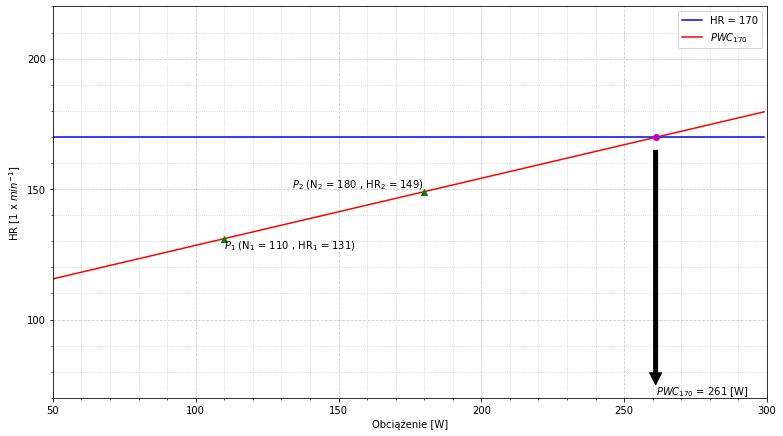

In [437]:
pic = 1                                  # variable for naming of pictures

for z1, z2 in zip(p1, p2):               # zip() function to create array with pairs of points
    
    fig, ax = plt.subplots(figsize=(12.80,7.20))                # figure as a container of plots
                                                                # axes where we contains information about figure
                                                                # argument figsize for good resolution of picture [1280x720]
                                                                
    ax.axis([50, 300, 70, 220])                                 # define axis of plot
    axes = ax.axis()
    
    arguments = np.arange(50, 300, 1)                           # I put a low value of step to raise a frequency of arguments
    f = np.linspace(hr, hr, len(arguments))                     # array of values for const line - the same len() as arguments   
    
    ax.plot(arguments, f, 'b', label = "HR = 170")
    
    """
    We need a small mathematical introduction for next step :)
    When we have two points, we can define only one line, which can be draw through them.
    
    Every line in (x, y) coordinate system we can respresent as:
    
    y = m*x + b, where:
    
    m = slope = (y1-y2)/(x1-x2)
    b = y-intercept = (x1*y2 - x2*y1)/(x1-x2)
    
    So, as we can see, we should use coordinates from pair of points to find mathematical formula for each line.
    """
    
    m = (z1[1]-z2[1])/(z1[0]-z2[0])                             # slope
    b = ( (z1[0]*z2[1]) - (z2[0]*z1[1]) )/(z1[0]-z2[0])         
    x = np.arange(axes[0], axes[1], 1)                          # arguments for our line
    y = m*x + b                                                 # values for our line
    
    ax.plot(x, y, 'r', label = "$PWC_{170}$")
    ax.plot([z1[0], z2[0]],[z1[1], z2[1]], 'g^')                # we plot our points in graph with labels
    ax.annotate(f"$P_{1}$ (N$_1$ = {z1[0]} , HR$_1$ = {z1[1]})", (z1[0], z1[1]), ha = 'left', va='top')
    ax.annotate(f"$P_{2}$ (N$_2$ = {z2[0]} , HR$_2$ = {z2[1]})", (z2[0], z2[1]), ha = 'right', va='bottom')
    
    idx = np.argwhere(np.diff(np.sign(f - y))).flatten()        # we are trying to find common point beetween two value arrays
    #print(idx)
    
    ax.plot(arguments[idx[0]], y[idx[0]], 'mo')                 # we mark this point with annotate and arrow
    #print(arguments[idx[0]], y[idx[0]])
    
    ax.annotate("", xy=(arguments[idx[0]], axes[2]), xytext=(arguments[idx[0]], y[idx[0]]),
                arrowprops=dict(facecolor='black', shrink=0.05))
    
    ax.annotate("$PWC_{170}$" + f" = {arguments[idx[0]]} [W]", xy=(arguments[idx[0]], axes[2]), ha='left', va='bottom')
    
    ax.legend()
    plt.xlabel('Obciążenie [W]')
    plt.ylabel('HR [1 x $min^{-1}$]')
    ax.grid(True)
    
    plt.xticks(np.arange(axes[0], axes[1], 10))                 # mark more axes in graph
    plt.yticks(np.arange(axes[2], axes[3], 10))
    
    ax.xaxis.set_major_locator(MultipleLocator(50))             # prepare style for major axes
    ax.yaxis.set_major_locator(MultipleLocator(50))
    
    ax.xaxis.set_minor_locator(MultipleLocator(10))             # prepare style for minor axes
    ax.yaxis.set_minor_locator(MultipleLocator(10))
    
    ax.grid(which='major', color='#CCCCCC', linestyle='--')     # grid on with prepared styles
    ax.grid(which='minor', color='#CCCCCC', linestyle=':')
    
    plt.savefig(f"images/Picture{pic}.png")                     # save graphs
    pic += 1                                                    # increment picture number
    plt.show()